<h1> CREDIT CARD FRAUD DETECTION <h1>
<h3> DATA SOURCE: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023 <h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


<p>Import dataset <p>

In [3]:
dataset = pd.read_csv('creditcard_2023.csv')

In [4]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


<H1> Data Cleaning <H1>

In [5]:
dataset.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
dataset.dropna(inplace=True)
dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)

In [7]:
dataset.drop(['id'], axis=1, inplace=True)

In [8]:
features = dataset.drop(['Class'], axis=1)

In [9]:
features = (features - features.mean()) / features.std()

AttributeError: 'Axes' object has no attribute 'show'

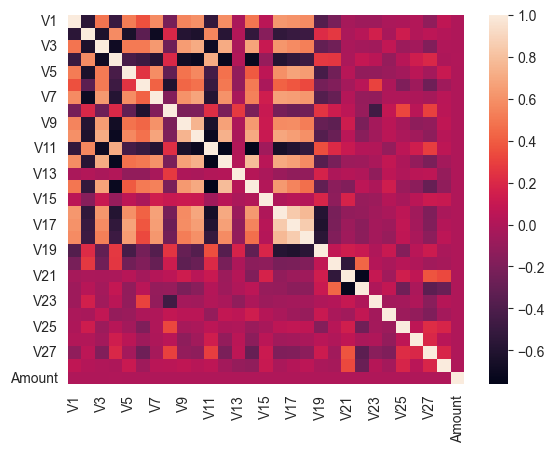

In [10]:
corr = features.corr()
plt = sns.heatmap(corr)
plt.show()

<H1> Preparing Training and Test sets </H1>

In [11]:
Y = dataset['Class']
Y = Y.astype("int64")
X = features

In [12]:
set_size = len(dataset.index)
train_size = int(set_size * 0.8)
test_size = set_size - train_size
train_set = dataset[:train_size]
test_set = dataset[train_size:]
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]


<h1>Preparing Model</h1>

In [13]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(29,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu'),
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])


In [14]:
model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\treym\AppData\Local\Temp\ipykernel_61140\2028216797.py", line 1, in <module>

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\treym\OneDrive\Desktop\PROJECTS\DataScience\venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2203]

In [ ]:
count = 0
vals = []
for y in Y_train:
    if y != 1 and y != 0:
        count +=1
        vals.append(y)
count